# Acceptance of Homosexuality Across Countries

## Introduction

**Context** <br>
Pew Research Center regularly conducts public opinion surveys in countries outside the United States as part of its ongoing exploration of attitudes, values and behaviors around the globe. In their Spring 2019 survey, Pew Research asked, "And which one of these comes closer to your opinion: 'Homosexuality should be accepted by society' OR 'Homosexuality should not be accepted by society.'" Pew Research [published](https://www.pewresearch.org/global/2020/06/25/global-divide-on-homosexuality-persists/) the results of the survey for public access, and the report includes a result for 33 countries around the world.

The notebook assess if there is a high relationship between the opinions of the country and other collected data on countries. Other data examined includes the [Hofstede Cultural Dimension](https://www.hofstede-insights.com/product/compare-countries/) and the []().<br><br>


**Questions:**
1. Do opinions vary across countries?
2. Is there a high correlation between a country's population acceptance of homosexuality and its respective Hofstede Cultural Dimensions scores?
3. Is there a high correlaion between a country's population acceptance of homosexuality and the GDP of the country?

<br>**Note** <br>
"Homosexuality" could be harm world in different parts of the world. Because of the clinical history of the word "homosexual," it is aggressively used by anti-gay extremists to suggest that gay people are somehow diseased or psychologically/emotionally disordered. The term is used in this workbook to stay true to the language used the Pew Research collection process. Using different language could miscategorize the data.

In [1]:
#Load Relevant Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Imports Pew Research dataset
countries_perceptions_df=pd.read_excel('countries acceptance of gay.xlsx')
countries_perceptions_df.head(4)

,Country,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total
0,United States,72,21,7,100
1,Canada,85,10,4,100
2,France,86,11,3,100
3,Germany,86,11,2,100


In [3]:
countries_perceptions_df.describe()

,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total
count,34.000000,34.000000,34.000000,34.0
mean,52.735294,38.529412,8.647059,100.0
std,28.386199,25.506072,6.979982,0.0
min,7.000000,5.000000,1.000000,100.0
25%,29.000000,19.250000,3.000000,100.0
50%,51.500000,37.500000,7.000000,100.0
75%,75.750000,51.750000,11.750000,100.0
max,94.000000,91.000000,27.000000,100.0


In [4]:
#Makes dataset long

countries_perceptions_long_df = pd.melt(countries_perceptions_df, 
                            id_vars=['Country'], 
                            value_vars=['Homosexuality should be accepted by society','Homosexuality should not be accepted by society',
                                       'DK/Refused','Total'],         
                            var_name='Answer Selection', 
                            value_name='Percent of Sample'
                           )

countries_perceptions_long_df['Answer Selection']=countries_perceptions_long_df['Answer Selection'].astype(str)

#pd.to_string(countries_perceptions_long_df['Answer Selection'], errors='coerce')

countries_perceptions_long_df.head(3)

,Country,Answer Selection,Percent of Sample
0,United States,Homosexuality should be accepted by society,72
1,Canada,Homosexuality should be accepted by society,85
2,France,Homosexuality should be accepted by society,86


Text(0.5,0,'Percent of Sample Selecting Answer')

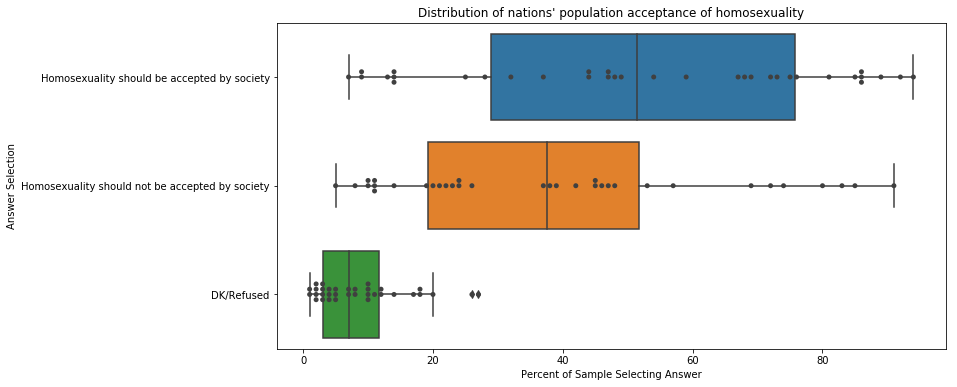

In [5]:
#Create box plot to see distribution of percent
make_graph = countries_perceptions_long_df[~(countries_perceptions_long_df['Answer Selection']=='Total')]
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(y='Answer Selection', x='Percent of Sample', data=make_graph, orient='h')
sns.swarmplot(y="Answer Selection", x="Percent of Sample", data=make_graph, orient='h', color=".25")
ax.set_title("Distribution of nations' population acceptance of homosexuality")
ax.set_xlabel("Percent of Sample Selecting Answer")

When reviewing the distribution acceptance and non-acceptance of homosexuality, it is clear that is not a worldwide stance on homosexuality. The range of percent of people that think homosexuality should be accepted in each nation is large. For 'Homosexuality should be accepted by society,' the difference between the first quartile and third quartile marks is 46.75 percentage points. 

----

## Hofestede Cultural Dimensions

[Geert Hofstede's cultural dimensions](https://geerthofstede.com/) theory proposes a method of analyzing cultures based on a handful of continuums. Hofsteded assess countries on six dimensions:

1. Power distance index (PDI): The power distance index is defined as “the extent to which the less powerful members of organizations and institutions (like the family) accept and expect that power is distributed unequally.”

2. Individualism vs. collectivism (IDV): This index explores the “degree to which people in a society are integrated into groups.”

3. Uncertainty avoidance index (UAI): The uncertainty avoidance index is defined as “a society's tolerance for ambiguity,” in which people embrace or avert an event of something unexpected, unknown, or away from the status quo.

4. Masculinity vs. femininity (MAS): In this dimension, masculinity is defined as “a preference in society for achievement, heroism, assertiveness and material rewards for success.”

5. Long-term orientation vs. short-term orientation (LTO): This dimension associates the connection of the past with the current and future actions/challenges.

6. Indulgence vs. restraint (IVR): This dimension is essentially a measure of happiness; whether or not simple joys are fulfilled.

The data will be used to assess if there is a strong correlation between acceptance towards homosexuality and countries cultural dimensions scores.

In [6]:
#Bring in dataset
cultural_dimensions_df = pd.read_excel('6-dimensions-for-website-2015-08-16.xls')
cultural_dimensions_df.head(3)

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64.0,27.0,41.0,52.0,32.000000,40.000000
1,AFW,Africa West,77.0,20.0,46.0,54.0,9.000000,78.000000
2,ALB,Albania,NaN,NaN,NaN,NaN,61.460957,14.508929


In [7]:
#The name of the country will be used as the key to merge the two datasets. First, I need to find where there is not a match and create a dictionary to change values.
countries_perceptions_df[~countries_perceptions_df['Country'].isin(cultural_dimensions_df['country'])]
cultural_dimensions_df['country'].unique()

#Creates dictionary to change country names for later merge
dimenisons_country_name_change = {
    'U.S.A.':'United States',
    'Great Britain':'United Kingdom',
    'Czech Rep':'Czech Republic',
    'Slovak Rep':'Slovakia',
    'Korea South':'South Korea',
    'Arab countries':'Tunisia',
    'Africa East':'Kenya',
}

#Replaces country names later merge
cultural_dimensions_df['country'].replace(dimenisons_country_name_change,inplace=True)

#Completes merge
dimensions_with_perceptions_df = pd.merge(left=countries_perceptions_df,right=cultural_dimensions_df,left_on='Country',right_on='country',how='left').drop(columns=['ctr','country'])

dimensions_with_perceptions_df.head(4)

,Country,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total,pdi,idv,mas,uai,ltowvs,ivr
0,United States,72,21,7,100,40.0,91.0,62.0,46.0,25.692695,68.080357
1,Canada,85,10,4,100,39.0,80.0,52.0,48.0,36.020151,68.303571
2,France,86,11,3,100,68.0,71.0,43.0,86.0,63.476071,47.767857
3,Germany,86,11,2,100,35.0,67.0,66.0,65.0,82.871537,40.401786


In [8]:
#Computes Pearson correlation of values
dimensions_with_perceptions_df.corr()[0:3]

,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total,pdi,idv,mas,uai,ltowvs,ivr
Homosexuality should be accepted by society,1.000000,-0.971102,-0.507792,NaN,-0.482191,0.630924,0.035416,-0.203706,-0.068964,0.478867
Homosexuality should not be accepted by society,-0.971102,1.000000,0.288228,NaN,0.478614,-0.668379,-0.045576,0.209612,0.010886,-0.372916
DK/Refused,-0.507792,0.288228,1.000000,NaN,0.277097,-0.229837,-0.010399,0.072240,0.248468,-0.586560


Text(0.5,0,"Country's Hofstede's Individualism vs Collectivism Score")

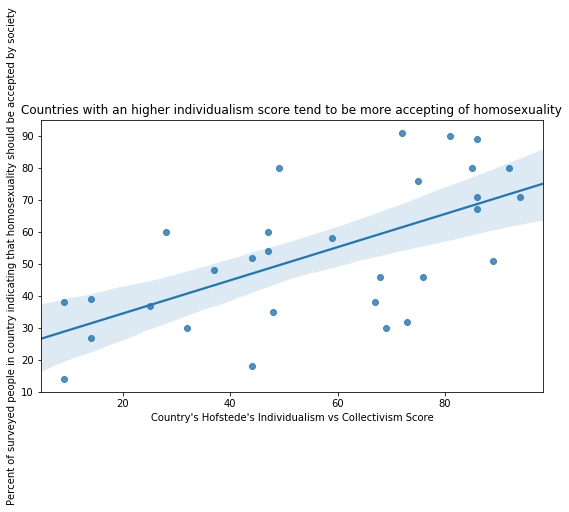

In [9]:
#Creates plot comparing acceptance of homosexuality and the idv score
fig, ax = plt.subplots(figsize=(9, 5))
sns.regplot(data=dimensions_with_perceptions_df, x="Homosexuality should be accepted by society", y="idv")
ax.set_title("Countries with an higher individualism score tend to be more accepting of homosexuality")
ax.set_ylabel("Percent of surveyed people in country indicating that homosexuality should be accepted by society")
ax.set_xlabel("Country's Hofstede's Individualism vs Collectivism Score")

Text(0.5,0,"Country's Hofstede's Individualism vs Collectivism Score")

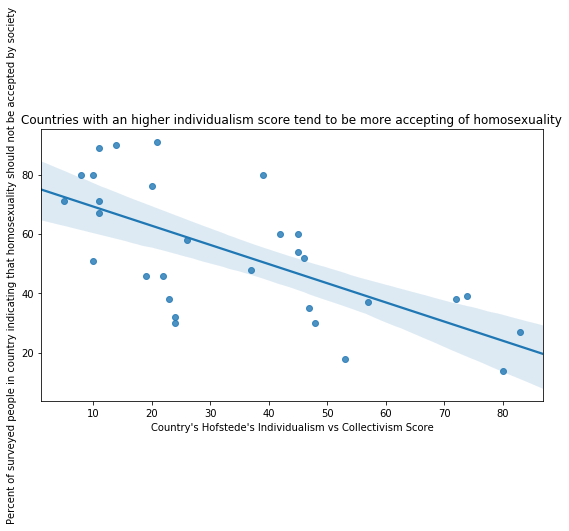

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.regplot(data=dimensions_with_perceptions_df, x="Homosexuality should not be accepted by society", y="idv")
ax.set_title("Countries with an higher individualism score tend to be more accepting of homosexuality")
ax.set_ylabel("Percent of surveyed people in country indicating that homosexuality should not be accepted by society")
ax.set_xlabel("Country's Hofstede's Individualism vs Collectivism Score")

The dimension with the strongest relationship with the population's acceptance of homoesexuality measure is the Individualism vs Collectivism score. This index explores the “degree to which people in a society are integrated into groups.” There was .63 correlation - a somewhat strong relationship - the idv measure and the percentage of people in the country that beleived homosexuality should be accepted by homosexuality. This suggests that countries with higher sense of individualism are more likely to accept homosexuality. <br><br>
Another interesting correlation existed between the idv measure and the percentage of people that believed homosexuality should not be accepted by homosexuality. The correlation value was slightly stronger than the previous one - at -.66. Countries with a higher idv score are less likely to be against homosexuality.

-----------------

## Acceptance of Homosexuality and GDP

[The World Bank](https://data.worldbank.org/) collects and publishes data to compare countries with each other on many development indicators. Data includes education data, environmental data, and much more. To answer the question, "Is there a high correlaion between a country's population acceptance of homosexuality and the GDP of the country," the data published on GDP per capita can be used to assess trends.

In [11]:
#Brings in dataset
WDI_gdp = pd.read_csv('Country GDP.csv')

#Change country names in dataset to use as keys in later merge
WDI_country_name_change = {
    'Slovak Republic':'Slovakia',
    'Korea, Dem. People’s Rep.':'South Korea',
    'Russian Federation':'Russia'
}

WDI_gdp['Country Name'].replace(WDI_country_name_change,inplace=True)


#Completes merge and turn to GDP column to useable type
perceptions_gdp_df = pd.merge(left=countries_perceptions_df,right=WDI_gdp[WDI_gdp['Series Code']=='NY.GDP.PCAP.CD'][['Country Name','2019 [YR2019]']],left_on='Country',right_on='Country Name',how='left').drop(columns=['Country Name'])
perceptions_gdp_df=perceptions_gdp_df.rename(columns = {'2019 [YR2019]':'GDP per Capita'})
perceptions_gdp_df['GDP per Capita']=pd.to_numeric(perceptions_gdp_df['GDP per Capita'], errors='coerce')

perceptions_gdp_df.head(3)

,Country,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total,GDP per Capita
0,United States,72,21,7,100,65297.517508
1,Canada,85,10,4,100,46194.725226
2,France,86,11,3,100,40493.928572


In [12]:
#Views Pearson correlations for comparing the 'GDP per Capita' variable to country's acceptance of homosexuality
perceptions_gdp_df.corr()['GDP per Capita'][:2]

Homosexuality should be accepted by society        0.724518
Homosexuality should not be accepted by society   -0.694215
Name: GDP per Capita, dtype: float64

Text(0.5,0,'2019 GDP per capita (current US$)')

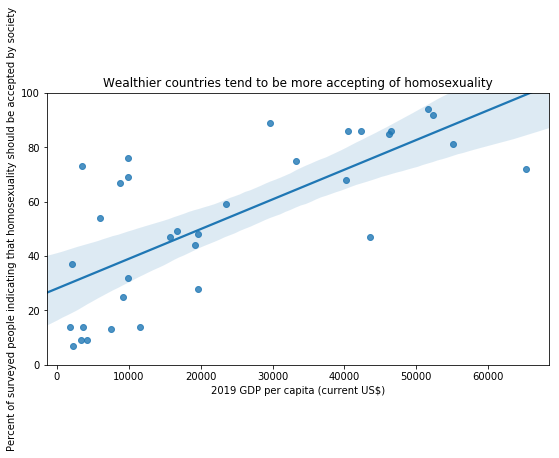

In [13]:
#Plot GDP compated to acceptance of homosexuality
fig, ax = plt.subplots(figsize=(9, 5))
sns.regplot(data=perceptions_gdp_df, y="Homosexuality should be accepted by society", x="GDP per Capita")
ax.set(ylim=(0,100))
ax.set_title("Wealthier countries tend to be more accepting of homosexuality")
ax.set_ylabel("Percent of surveyed people indicating that homosexuality should be accepted by society")
ax.set_xlabel("2019 GDP per capita (current US$)")

GDP and acceptance towards homosexuality has a pearson correlation of .725. The relationship can be considered strong. This suggest that the wealthier countries tend to be more acceptance of homosexuality.

_____

## Assessing High Incomes Countries Specifically
This was not one of the original questions. In the last section, it can be noted that there is a strong correlation between GDP and acceptance towards homosexuality. If high income countries were to be isolated, would new correlations in between acceptance towards homosexuality and the Hofestede Cultural Dimensions emerge? The World Bank groups nations into income groups based on GDP. The [listing](https://datahelpdesk.worldbank.org/knowledgebase/articles/378834-how-does-the-world-bank-classify-countries) will be used to categorize countries in the perceptions dataset.  

In [14]:
#Bring in data set
WDI_income_group=pd.read_excel('OGHIST.xls', sheet_name='Country Analytical History')
WDI_income_group

,World Bank Analytical Classifications,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
NaN,(presented in World Development Indicators),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,GNI per capita in US$ (Atlas methodology),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Bank's fiscal year:,FY89,FY90,FY91,FY92,FY93,FY94,FY95,FY96,FY97,...,FY12,FY13,FY14,FY15,FY16,FY17,FY18,FY19,FY20,FY21
NaN,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
NaN,Low income (L),<= 480,<= 545,<= 580,<= 610,<= 635,<= 675,<= 695,<= 725,<= 765,...,"<= 1,005","<= 1,025","<= 1,035","<= 1,045","<= 1,045","<= 1,025","<= 1,005",<= 995,"<= 1,025","<= 1,035"
NaN,Lower middle income (LM),"481-1,940","546-2,200","581-2,335","611-2,465","636-2,555","676-2,695","696-2,785","726-2,895","766-3,035",...,"1,006-3,975","1,026-4,035","1,036-4,085","1,046-4,125","1,046-4,125","1,026-4,035","1,006-3,955","996-3,895","1,026-3,995","1,036 - 4,045"
NaN,Upper middle income (UM),"1,941-6,000","2,201-6,000","2,336-6,000","2,466-7,620","2,556-7,910","2,696-8,355","2,786-8,625","2,896-8,955","3,036-9,385",...,"3,976-12,275","4,036-12,475","4,086-12,615","4,126-12,745","4,126-12,735","4,036-12,475","3,956-12,235","3,896-12,055","3,996-12,375","4,046 - 12,535"
NaN,High income (H),"> 6,000","> 6,000","> 6,000","> 7,620","> 7,910","> 8,355","> 8,625","> 8,955","> 9,385",...,"> 12,275","> 12,475","> 12,615","> 12,745","> 12,735","> 12,475","> 12,235","> 12,055","> 12,375","> 12,535"
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#WDI included rows in the start of file to expain the data. Code adjusts where the df should start
WDI_income_group=WDI_income_group.reset_index()
WDI_income_group.columns=WDI_income_group.iloc[4]
WDI_income_group=WDI_income_group.rename(columns={WDI_income_group.columns[0]:'Country Code','Data for calendar year :':'Country Name'})
WDI_income_group=WDI_income_group[10:].reset_index().drop(columns=['index'])

WDI_income_group.head(5)

4,Country Code,Country Name,1987,1988,1989,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,Afghanistan,L,L,L,L,L,L,L,L,...,L,L,L,L,L,L,L,L,L,L
1,ALB,Albania,..,..,..,LM,LM,LM,L,L,...,UM,LM,UM,UM,UM,UM,UM,UM,UM,UM
2,DZA,Algeria,UM,UM,LM,LM,LM,LM,LM,LM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,LM
3,ASM,American Samoa,H,H,H,UM,UM,UM,UM,UM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
4,AND,Andorra,..,..,..,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H


In [16]:
#Creates copy of df
WDI_income_group_df=WDI_income_group.copy()

#Changes the income categories to their full names
change_income_keys={
    'L':'Lower income',
    'LM':'Lower middle income',
    'UM':'Upper middle income',
    'H':'High income'}
WDI_income_group_df.replace(change_income_keys,inplace=True)


#Changes neccesary country names to use as keys for later merge
WDI_country_name_change = {
    'Slovak Republic':'Slovakia',
    'Russian Federation':'Russia',
    'Korea, Dem. Rep.':'South Korea'}
WDI_income_group_df['Country Name'].replace(WDI_country_name_change,inplace=True)

#Completes merge
dimensions_perceptions_gdp_df = pd.merge(left=dimensions_with_perceptions_df,right=WDI_income_group_df[['Country Name',2019]],left_on='Country',right_on='Country Name',how='left').drop(columns=['Country Name']).rename(columns={2019:'Income Group'})
dimensions_perceptions_gdp_df = pd.merge(left=dimensions_perceptions_gdp_df,right=WDI_gdp[WDI_gdp['Series Code']=='NY.GDP.PCAP.CD'][['Country Name','2019 [YR2019]']],left_on='Country',right_on='Country Name',how='left').drop(columns=['Country Name']).rename(columns = {'2019 [YR2019]':'GDP per Capita'})
dimensions_perceptions_gdp_df['GDP per Capita']=pd.to_numeric(dimensions_perceptions_gdp_df['GDP per Capita'], errors='coerce')

dimensions_perceptions_gdp_df.head(5)



,Country,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total,pdi,idv,mas,uai,ltowvs,ivr,Income Group,GDP per Capita
0,United States,72,21,7,100,40.0,91.0,62.0,46.0,25.692695,68.080357,High income,65297.517508
1,Canada,85,10,4,100,39.0,80.0,52.0,48.0,36.020151,68.303571,High income,46194.725226
2,France,86,11,3,100,68.0,71.0,43.0,86.0,63.476071,47.767857,High income,40493.928572
3,Germany,86,11,2,100,35.0,67.0,66.0,65.0,82.871537,40.401786,High income,46445.249101
4,Greece,48,47,5,100,60.0,35.0,57.0,112.0,45.340050,49.553571,High income,19582.535979


In [17]:
dimensions_perceptions_gdp_df.groupby('Income Group').count()

,Country,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total,pdi,idv,mas,uai,ltowvs,ivr,GDP per Capita
Income Group,,,,,,,,,,,,
High income,18,18,18,18,18,18,18,18,18,18,17,18
Lower income,1,1,1,1,1,1,1,1,1,1,1,0
Lower middle income,6,6,6,6,6,4,4,4,4,6,6,6
Upper middle income,9,9,9,9,9,7,7,7,7,8,8,9


Text(0.5,0,'2019 GDP per capita (current US$)')

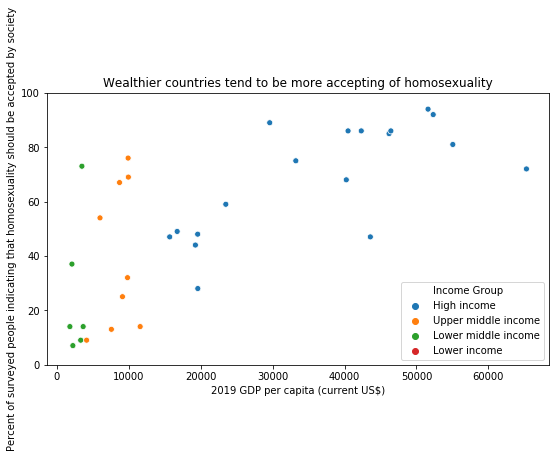

In [18]:
#Plot GDP compared to acceptance of homosexuality
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(data=dimensions_perceptions_gdp_df, y="Homosexuality should be accepted by society", x="GDP per Capita",hue='Income Group')
ax.set(ylim=(0,100))
ax.set_title("Wealthier countries tend to be more accepting of homosexuality")
ax.set_ylabel("Percent of surveyed people indicating that homosexuality should be accepted by society")
ax.set_xlabel("2019 GDP per capita (current US$)")

In [19]:
dimensions_perceptions_gdp_df[(dimensions_perceptions_gdp_df['Income Group']=='High income')].corr()[0:2]

,Homosexuality should be accepted by society,Homosexuality should not be accepted by society,DK/Refused,Total,pdi,idv,mas,uai,ltowvs,ivr,GDP per Capita
Homosexuality should be accepted by society,1.00000,-0.97205,-0.819498,NaN,-0.291793,0.488474,-0.303924,-0.435712,-0.152599,0.738982,0.703783
Homosexuality should not be accepted by society,-0.97205,1.00000,0.663961,NaN,0.321413,-0.538456,0.349971,0.494115,0.066348,-0.687854,-0.696294


Text(0.5,0,"Country's Hofstede's Indulgence vs. Restraint Score")

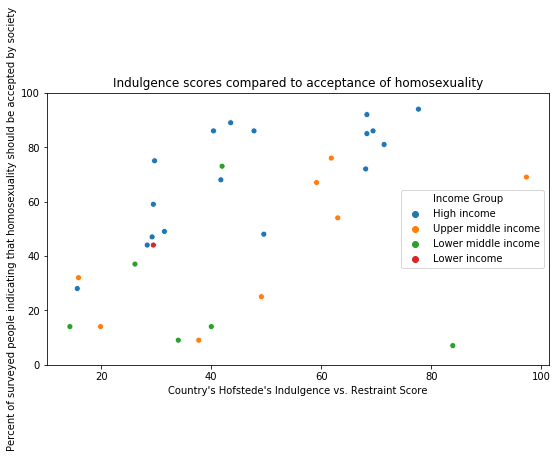

In [20]:
#Plot GDP compated to acceptance of homosexuality
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(data=dimensions_perceptions_gdp_df, y="Homosexuality should be accepted by society", x="ivr",hue='Income Group')
ax.set(ylim=(0,100))
ax.set_title("Indulgence scores compared to acceptance of homosexuality")
ax.set_ylabel("Percent of surveyed people indicating that homosexuality should be accepted by society")
ax.set_xlabel("Country's Hofstede's Indulgence vs. Restraint Score")

Text(0.5,0,"Country's Hofstede's Indulgence vs. Restraint Score")

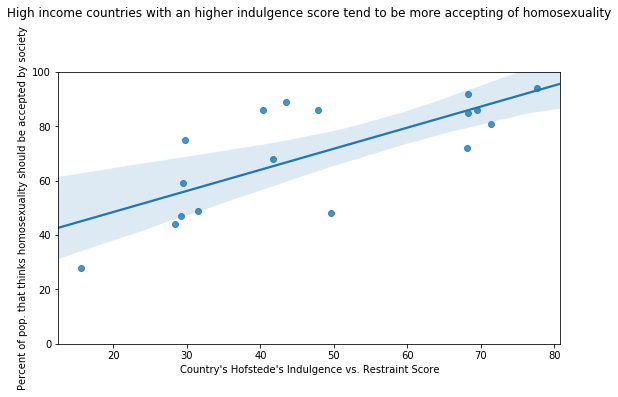

In [21]:
#Plot GDP compated to acceptance of homosexuality
make_graph=dimensions_perceptions_gdp_df[dimensions_perceptions_gdp_df['Income Group']=='High income']
fig, ax = plt.subplots(figsize=(9, 5))
sns.regplot(data=make_graph, y="Homosexuality should be accepted by society", x="ivr")
ax.set(ylim=(0,100))
ax.set_title("High income countries with an higher indulgence score tend to be more accepting of homosexuality",  pad=55)
ax.set_ylabel("Percent of pop. that thinks homosexuality should be accepted by society")
ax.set_xlabel("Country's Hofstede's Indulgence vs. Restraint Score")

When isolating countries categorized as high income, the dimension with the strongest relationship with the population's acceptance of homoesexuality measure is the Indulgence vs.Rrestraint score. TThis dimension is essentially a measure of happiness; whether or not simple joys are fulfilled. There was a correlation of .74 - a strong relationship - between the idv measure and the percentage of people in the country that beleived homosexuality should be accepted by homosexuality. This suggests that high income countries that has more a culture focused on emjoyment of life are more likely to accept homosexuality.